In [95]:
from scipy.stats import t, norm, multinomial
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import random
from numpy.random import choice

In [96]:
def importance_resampling(size):
    samples = [np.random.normal(loc=0,scale=1) for _ in range(size)]
    weights = []
    for sample in samples:
        weights.append(t.pdf(sample, 3)/norm.pdf(sample))
    weights = np.asarray(weights)
    normalized_weights = weights/np.sum(weights)
    resampled = random.choices(samples, k=size, weights=normalized_weights)
    return resampled

In [97]:
resampled_100 = importance_resampling(100)
resampled_10000 = importance_resampling(10000)

In [98]:
x = np.linspace(-5,5,10000)
t_values = t.pdf(x, 3)

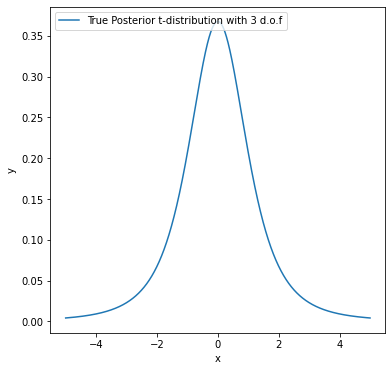

In [105]:
fig = plt.figure(figsize=(6,6))
plt.plot(x, t_values, label='True Posterior t-distribution with 3 d.o.f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

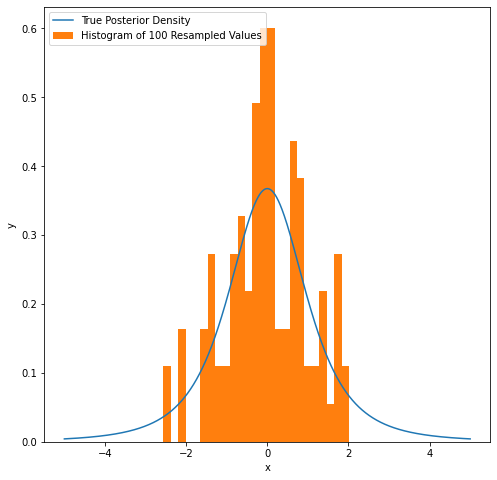

In [99]:
fig = plt.figure(figsize=(8,8))
plt.plot(x, t_values, label='True Posterior Density')
plt.hist(resampled_100, density=True, bins=25, label='Histogram of 100 Resampled Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

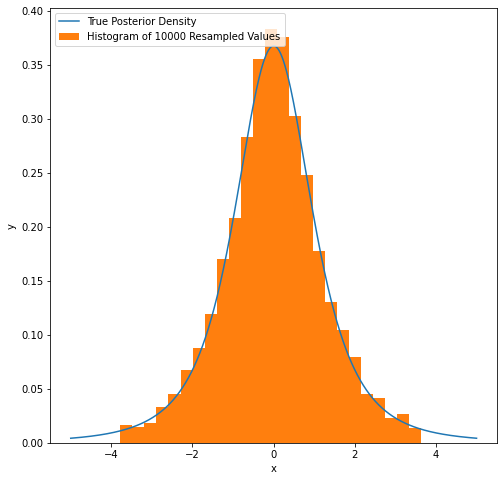

In [100]:
fig = plt.figure(figsize=(8,8))
plt.plot(x, t_values, label='True Posterior Density')
plt.hist(resampled_10000, density=True, bins=25, label='Histogram of 10000 Resampled Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')